In [20]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Csv File 

In [21]:
df = pd.read_csv("DataSet1.csv")
df.head(10)

,Day of Week,Director,Genre,Movie Title,Release Date,Studio,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US
0,Friday,Brad Bird,action,Tomorrowland,22-05-2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14-03-2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,action,The Expendables 3,15-08-2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16-03-2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28-06-2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6
5,Friday,David Ayer,action,Fury,17-10-2014,Sony,212.8,80.0,211.8,5.8,2.85,126,59.5,131.8,164.8,134,85.8,40.5
6,Thursday,Rob Marshall,adventure,Into the Woods,25-12-2014,Buena Vista Studios,213.9,50.0,212.9,6.0,3.16,84.9,39.9,162.9,325.8,125,128.0,60.1
7,Friday,Daniel Espinosa,action,Safe House,10-02-2012,Universal,215.5,85.0,208.1,6.8,3.45,81.7,39.3,123.1,144.8,115,126.4,60.7
8,Friday,Gary Shore,action,Dracula Untold,10-10-2014,Universal,216.5,70.0,215.5,6.3,2.92,159.2,73.9,145.5,207.9,92,56.3,26.1
9,Friday,"Henry Joost, Ariel Schulman",horror,Paranormal Activity 3,21-10-2011,Paramount Pictures,218.8,5.0,207,5.9,2.90,103,49.8,202,4040.0,84,104.0,50.2


# Checking for null Values 

In [22]:
# Check for null values in each column
null_counts = df.isnull().sum()

# Display columns with null values and their respective counts
print("Columns with Null Values:")
print(null_counts)

Columns with Null Values:
Day of Week               0
Director                  0
Genre                     0
Movie Title               0
Release Date              0
Studio                    0
Adjusted Gross ($mill)    0
Budget ($mill)            0
Gross ($mill)             0
IMDb Rating               0
MovieLens Rating          0
Overseas ($mill)          0
Overseas%                 0
Profit ($mill)            0
Profit%                   0
Runtime (min)             0
US ($mill)                0
Gross % US                0
dtype: int64


# Number of movies produced by each Director

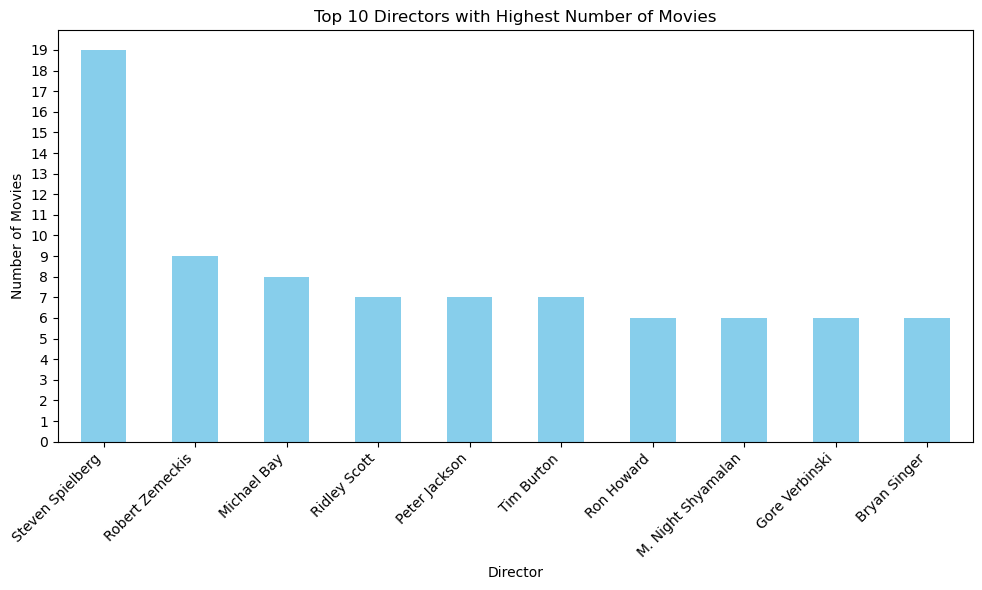

In [23]:
# Count the number of movies for each director
director_counts = df['Director'].value_counts().head(10)

# Plotting
plt.figure(figsize=(10, 6))
director_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Directors with Highest Number of Movies')
plt.xlabel('Director')
plt.ylabel('Number of Movies')

# Set y-tick labels to integer values
plt.yticks(range(int(director_counts.max()) + 1))

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [24]:
# Count the number of movies for each director
director_counts = df['Director'].value_counts().head(10)

print("Top 10 Directors with Highest Number of Movies:")
print(director_counts)

Top 10 Directors with Highest Number of Movies:
Director
Steven Spielberg      19
Robert Zemeckis        9
Michael Bay            8
Ridley Scott           7
Peter Jackson          7
Tim Burton             7
Ron Howard             6
M. Night Shyamalan     6
Gore Verbinski         6
Bryan Singer           6
Name: count, dtype: int64


# Director with Highest Earnings

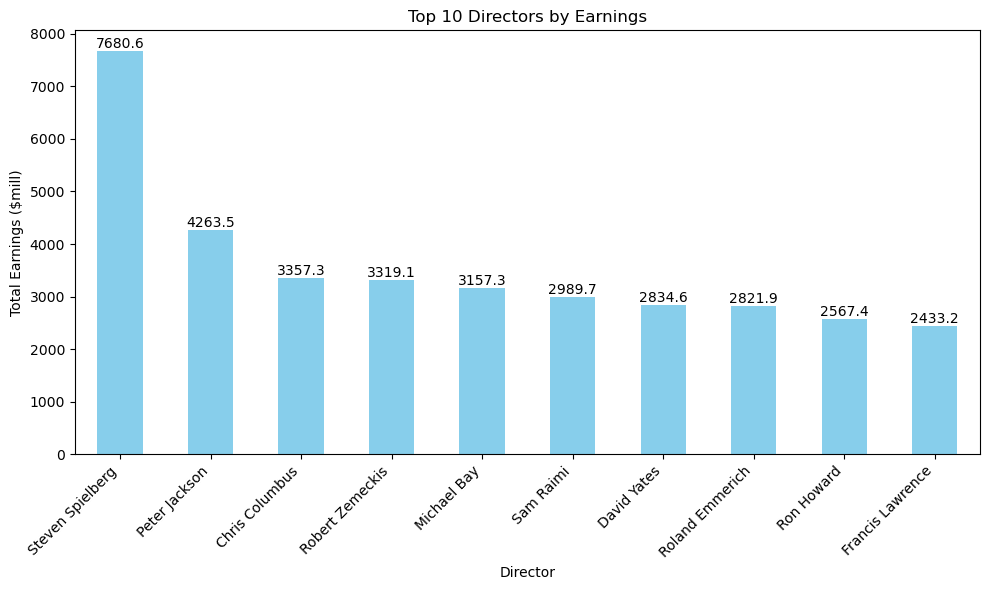

In [25]:
# Convert 'Gross ($mill)' column to numeric
df['Gross ($mill)'] = pd.to_numeric(df['Gross ($mill)'], errors='coerce')

# Grouping by director and summing up the earnings
director_earnings = df.groupby('Director')['Gross ($mill)'].sum()

# Sorting the directors based on earnings in descending order
director_earnings = director_earnings.sort_values(ascending=False)

# Selecting the top 10 directors
top_directors = director_earnings.head(10)

# Plotting
plt.figure(figsize=(10, 6))
top_directors.plot(kind='bar', color='skyblue')
plt.title('Top 10 Directors by Earnings')
plt.xlabel('Director')
plt.ylabel('Total Earnings ($mill)')
plt.xticks(rotation=45, ha='right')
# Annotating each bar with its corresponding value
for index, value in enumerate(top_directors):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Steven Spielberg Top 10 Movies Based on Imb Rating

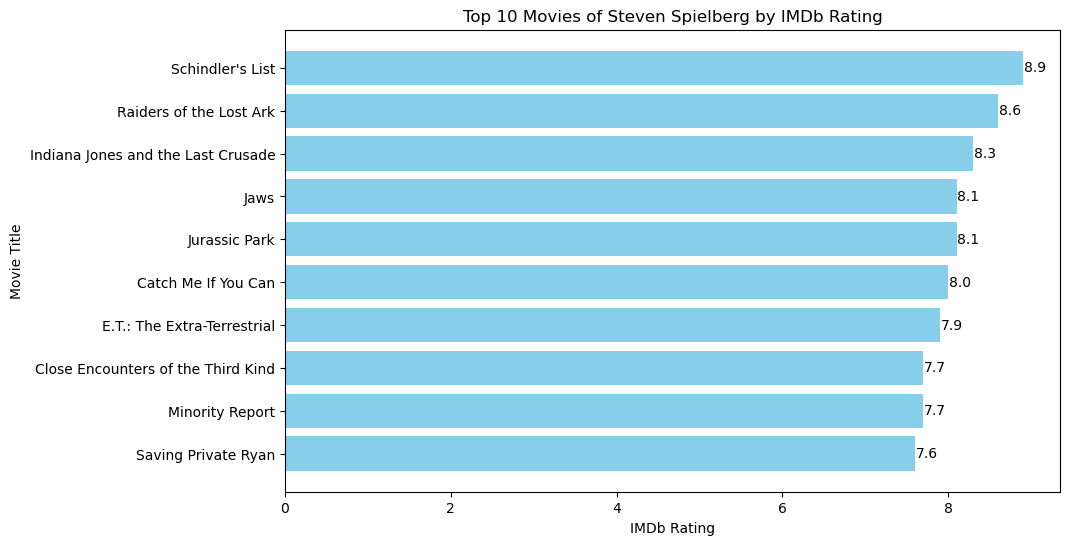

In [26]:
# Specify the director's name
director_name = "Steven Spielberg"

# Filter the dataset by the director's name
director_movies = df[df['Director'] == director_name]

# Top 10 movies by IMDb rating
top_movies_imdb = director_movies.sort_values(by='IMDb Rating', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))

# Plot top 10 movies by IMDb rating
bars = plt.barh(top_movies_imdb['Movie Title'], top_movies_imdb['IMDb Rating'], color='skyblue')
plt.xlabel('IMDb Rating')
plt.ylabel('Movie Title')
plt.title('Top 10 Movies of ' + director_name + ' by IMDb Rating')

# Annotate the IMDb ratings on the plot
for bar, rating in zip(bars, top_movies_imdb['IMDb Rating']):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2, str(round(rating, 2)), 
             ha='left', va='center')

plt.gca().invert_yaxis()  # Invert y-axis to display highest rating at the top
plt.show()

# Steven Spielberg Top 10 Movies Based on Profit Gnerated

C:\Users\Sahil\AppData\Local\Temp\ipykernel_12108\1256450293.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  director_movies['Profit ($mill)'] = pd.to_numeric(director_movies['Profit ($mill)'], errors='coerce')


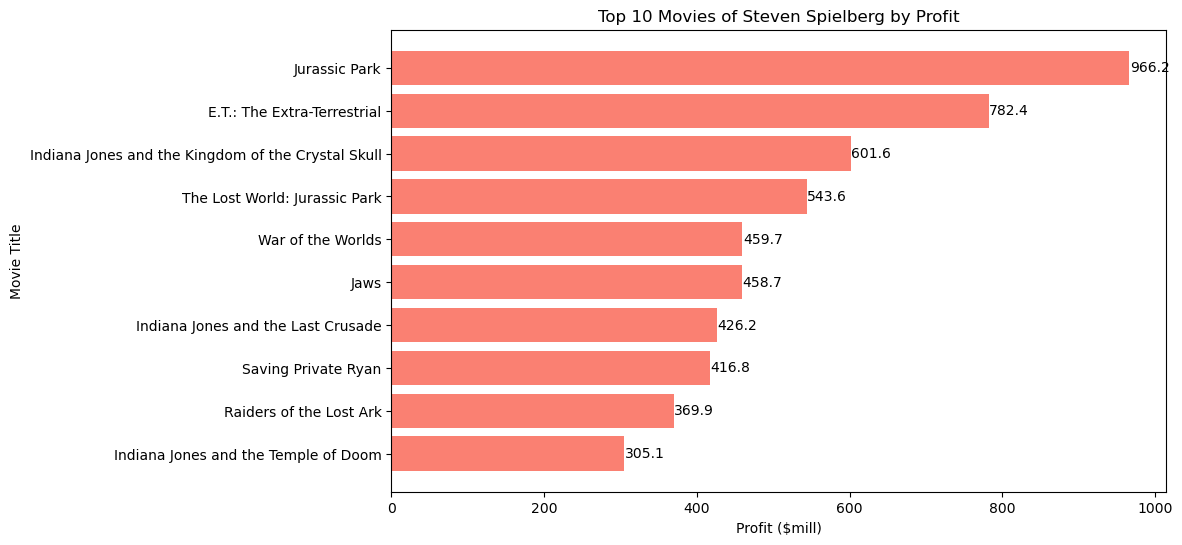

In [27]:
# Convert 'Profit ($mill)' column to numerical values
director_movies['Profit ($mill)'] = pd.to_numeric(director_movies['Profit ($mill)'], errors='coerce')

# Top 10 movies by profit
top_movies_profit = director_movies.sort_values(by='Profit ($mill)', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))

# Plot top 10 movies by profit
bars = plt.barh(top_movies_profit['Movie Title'], top_movies_profit['Profit ($mill)'], color='salmon')
plt.xlabel('Profit ($mill)')
plt.ylabel('Movie Title')
plt.title('Top 10 Movies of ' + director_name + ' by Profit')

# Annotate the profit values on the plot
for bar, profit in zip(bars, top_movies_profit['Profit ($mill)']):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, str(round(profit, 2)), 
             ha='left', va='center')

plt.gca().invert_yaxis()  # Invert y-axis to display highest profit at the top
plt.show()


# Genre trends overtime

C:\Users\Sahil\AppData\Local\Temp\ipykernel_12108\1319233015.py:5: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Release Date'] = pd.to_datetime(df['Release Date'])


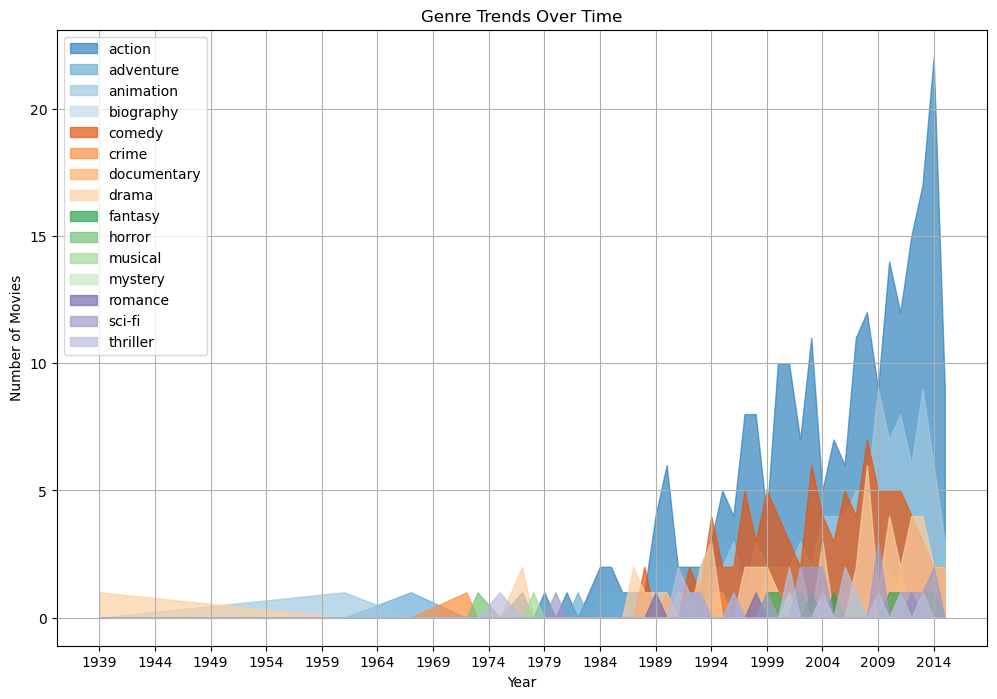

In [28]:
import matplotlib.cm as cm

# Assuming df is your DataFrame with movie data
# Convert 'Release Date' column to datetime
df['Release Date'] = pd.to_datetime(df['Release Date'])

# Extract the release year from the 'Release Date' column
df['Release Year'] = df['Release Date'].dt.year

# Group the data by 'Release Year' and 'Genre' and count the number of movies in each genre for each year
genre_counts = df.groupby(['Release Year', 'Genre']).size().unstack(fill_value=0)

# Plotting the stacked area plot with unique colors for each genre
plt.figure(figsize=(12, 8))

# Define a colormap with a sufficient number of colors
colors = cm.tab20c.colors  # You can choose any other colormap

# Use a loop to plot each genre as a separate stacked area with a unique color
for i, genre in enumerate(genre_counts.columns):
    plt.fill_between(genre_counts.index, genre_counts[genre], label=genre, color=colors[i], alpha=0.7)

plt.title('Genre Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend(loc='upper left')
plt.grid(True)
plt.xticks(range(df['Release Year'].min(), df['Release Year'].max() + 1, 5))  # Adjust x-axis ticks for better readability
plt.show()

# Top 5 Action Movies Based on IMDb Rating

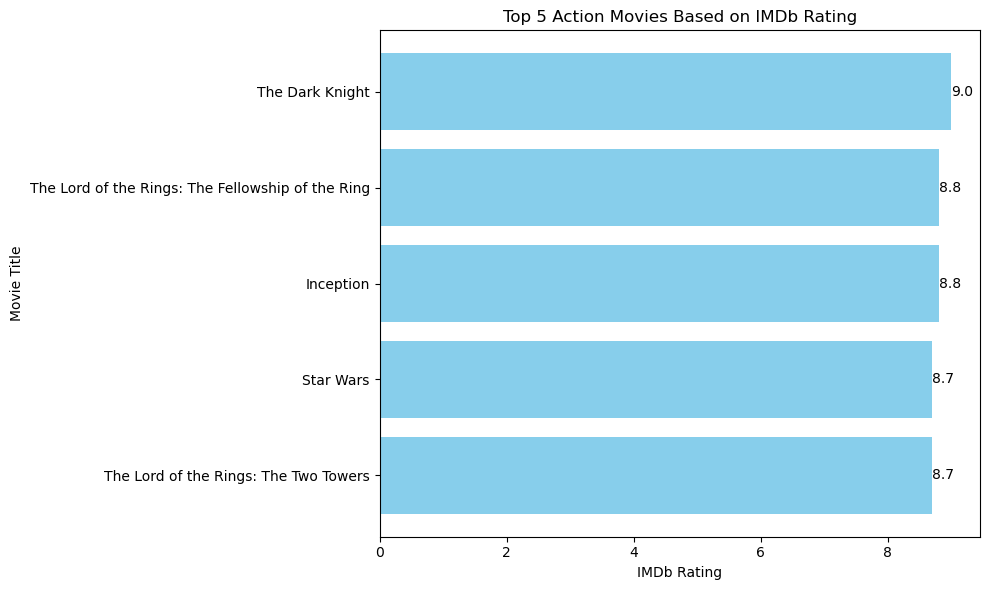

In [29]:
# Filter action movies
action_movies = df[df['Genre'] == 'action'].sort_values(by='IMDb Rating', ascending=False).head(5)

# Plotting top 5 action movies
plt.figure(figsize=(10, 6))
bars = plt.barh(action_movies['Movie Title'], action_movies['IMDb Rating'], color='skyblue')
plt.xlabel('IMDb Rating')
plt.ylabel('Movie Title')
plt.title('Top 5 Action Movies Based on IMDb Rating')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest rating at the top

# Annotate the IMDb rating values on the plot
for bar, rating in zip(bars, action_movies['IMDb Rating']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, str(round(rating, 2)), ha='left', va='center')

plt.tight_layout()
plt.show()

# Top 5 Action Movies Based on Profit Generated 

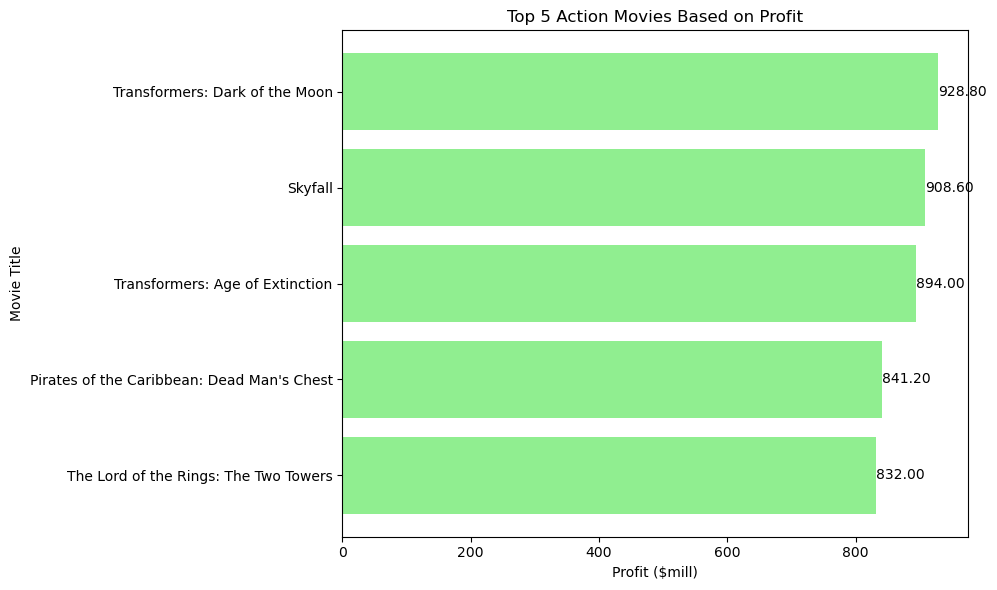

In [30]:
# Convert 'Profit ($mill)' column to numeric
df['Profit ($mill)'] = pd.to_numeric(df['Profit ($mill)'], errors='coerce')

# Filter action movies
action_movies_profit = df[df['Genre'] == 'action'].sort_values(by='Profit ($mill)', ascending=False).head(5)

# Plotting top 5 action movies based on profit
plt.figure(figsize=(10, 6))
bars = plt.barh(action_movies_profit['Movie Title'], action_movies_profit['Profit ($mill)'], color='lightgreen')
plt.xlabel('Profit ($mill)')
plt.ylabel('Movie Title')
plt.title('Top 5 Action Movies Based on Profit')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest profit at the top

# Annotate the profit values on the plot
for bar, profit in zip(bars, action_movies_profit['Profit ($mill)']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{profit:.2f}', ha='left', va='center')

plt.tight_layout()
plt.show()


# Top 10 Movies Based On Movies Lens Rating

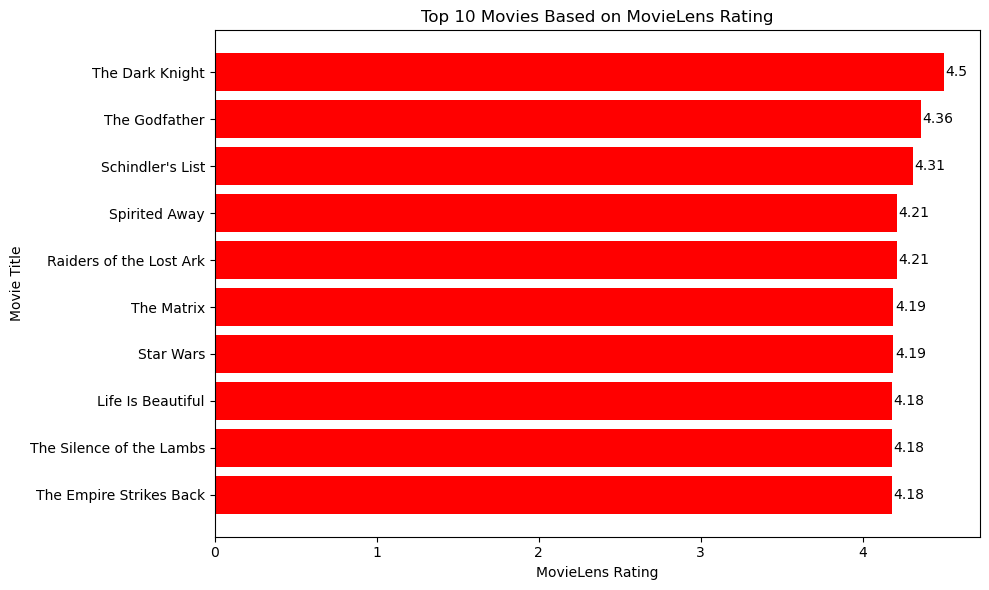

In [31]:
# Get the top 10 movies based on MovieLens rating
top_10_movies_movielens = df.nlargest(10, 'MovieLens Rating')

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_movies_movielens['Movie Title'], top_10_movies_movielens['MovieLens Rating'], color='red')
plt.xlabel('MovieLens Rating')
plt.ylabel('Movie Title')
plt.title('Top 10 Movies Based on MovieLens Rating')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest rating at the top

# Annotate the rating values on the plot
for bar, rating in zip(bars, top_10_movies_movielens['MovieLens Rating']):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, str(round(rating, 2)), 
             va='center', ha='left')

plt.tight_layout()
plt.show()

# Top Director for Each Genre Based on Profit

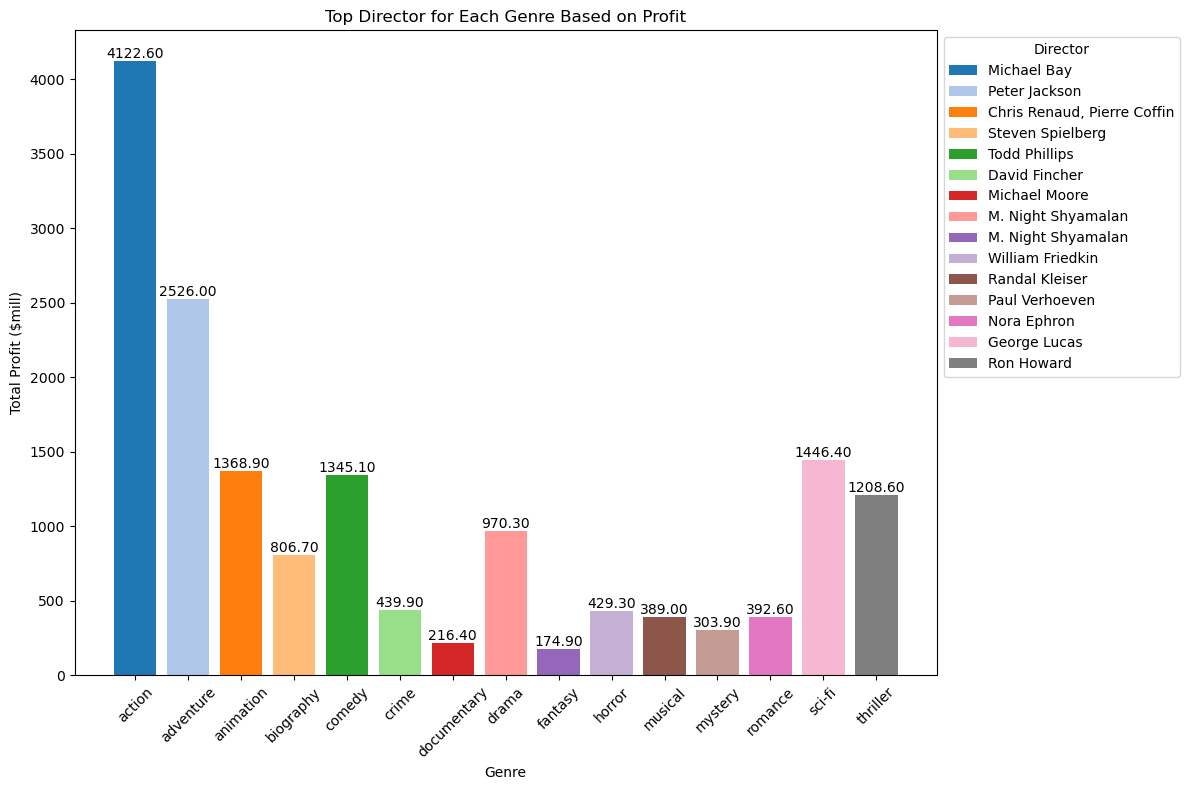

In [32]:
# Group the dataset by genre and director, then calculate the sum of profit for each combination
genre_director_profit = df.groupby(['Genre', 'Director'])['Profit ($mill)'].sum().reset_index()

# Find the top director for each genre based on profit
top_directors_by_genre_profit = genre_director_profit.loc[genre_director_profit.groupby('Genre')['Profit ($mill)'].idxmax()]

# Get the list of 15 distinct colors from a seaborn color palette
colors = sns.color_palette('tab20', n_colors=15)

# Create a dictionary mapping each genre to its corresponding color
genre_color_map = dict(zip(genre_director_profit['Genre'].unique(), colors))

# Create a grouped bar plot with unique colors for each genre
plt.figure(figsize=(12, 8))
for genre, director, profit in zip(top_directors_by_genre_profit['Genre'], top_directors_by_genre_profit['Director'], top_directors_by_genre_profit['Profit ($mill)']):
    bar = plt.bar(genre, profit, label=director, color=genre_color_map[genre])
    plt.text(bar[0].get_x() + bar[0].get_width() / 2, bar[0].get_height() + 0.5, f'{profit:.2f}', ha='center', va='bottom')

# Add labels and legend
plt.title('Top Director for Each Genre Based on Profit')
plt.xlabel('Genre')
plt.ylabel('Total Profit ($mill)')
plt.xticks(rotation=45)
plt.legend(title='Director', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Top Director for Each Genre Based on IMDb Rating

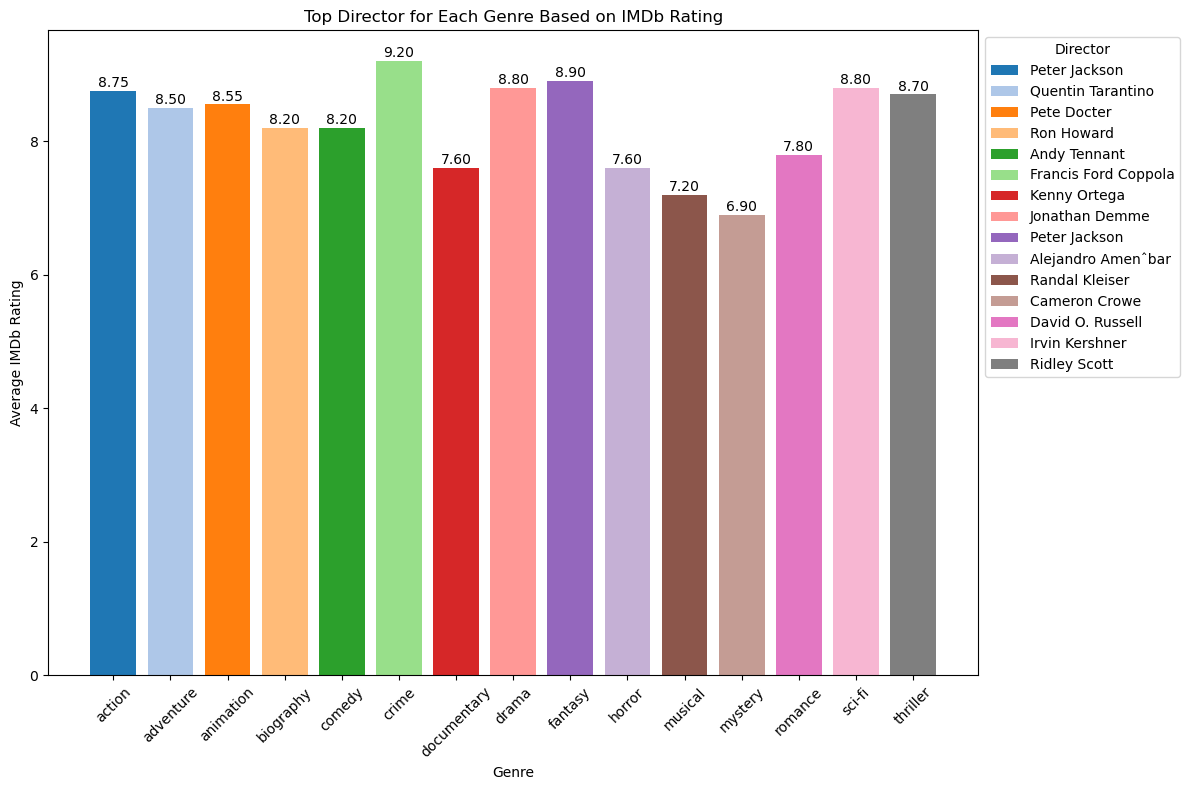

In [33]:
# Group the dataset by genre and director, then calculate the mean IMDb rating for each combination
genre_director_rating = df.groupby(['Genre', 'Director'])['IMDb Rating'].mean().reset_index()

# Find the top director for each genre based on IMDb rating
top_directors_by_genre_rating = genre_director_rating.loc[genre_director_rating.groupby('Genre')['IMDb Rating'].idxmax()]

# Get the list of 15 distinct colors from a seaborn color palette
colors = sns.color_palette('tab20', n_colors=15)

# Create a dictionary mapping each genre to its corresponding color
genre_color_map = dict(zip(genre_director_rating['Genre'].unique(), colors))

# Create a grouped bar plot with unique colors for each genre
plt.figure(figsize=(12, 8))
for genre, director, rating in zip(top_directors_by_genre_rating['Genre'], top_directors_by_genre_rating['Director'], top_directors_by_genre_rating['IMDb Rating']):
    bar = plt.bar(genre, rating, label=director, color=genre_color_map[genre])
    plt.text(bar[0].get_x() + bar[0].get_width() / 2, bar[0].get_height() + 0.01, f'{rating:.2f}', ha='center', va='bottom')

# Add labels and legend
plt.title('Top Director for Each Genre Based on IMDb Rating')
plt.xlabel('Genre')
plt.ylabel('Average IMDb Rating')
plt.xticks(rotation=45)
plt.legend(title='Director', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Total Revenue Generated by each studio

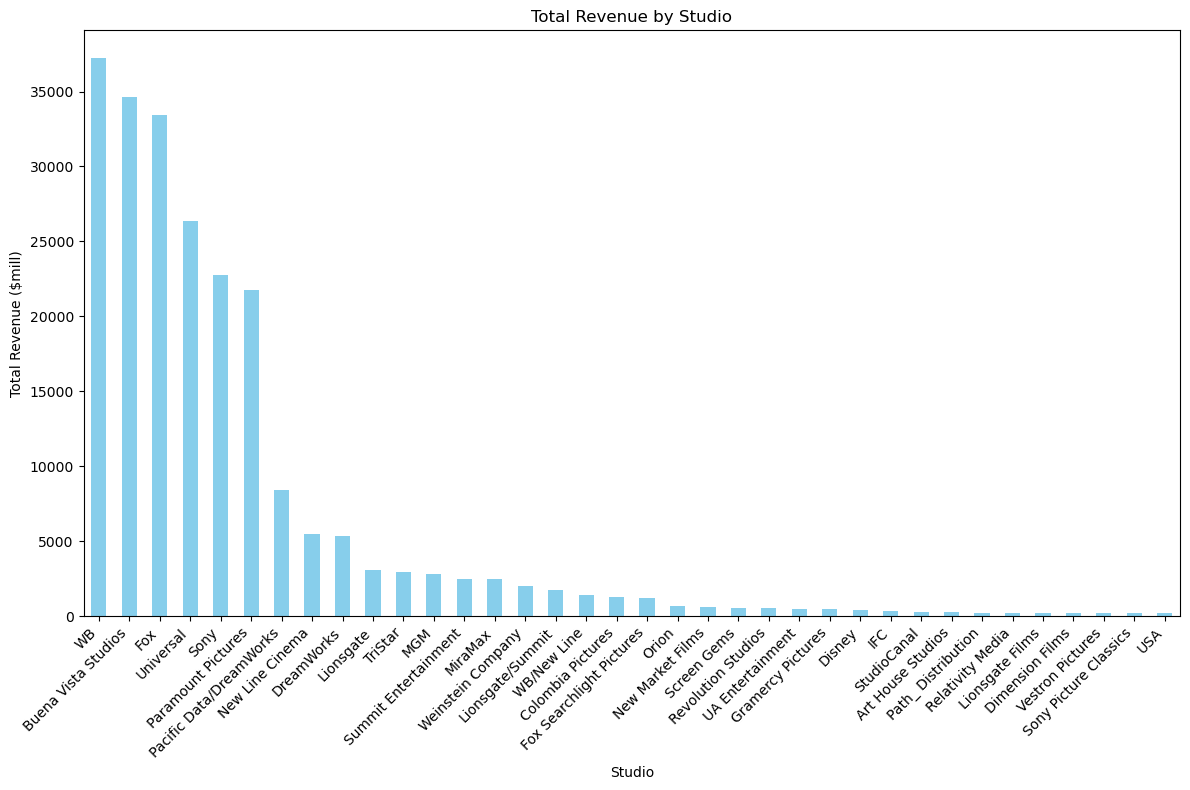

In [34]:
# Group the data by studio and calculate the total revenue for each studio
total_revenue_by_studio = df.groupby('Studio')['Gross ($mill)'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
total_revenue_by_studio.plot(kind='bar', color='skyblue')
plt.title('Total Revenue by Studio')
plt.xlabel('Studio')
plt.ylabel('Total Revenue ($mill)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

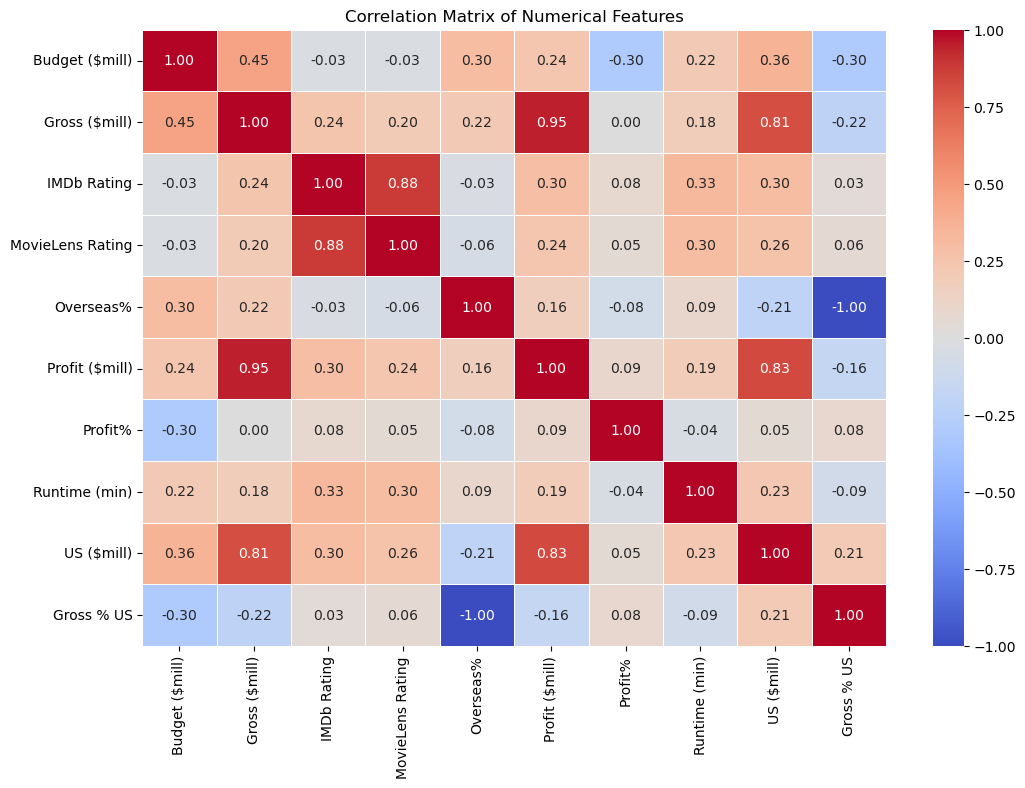

In [39]:
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numerical_columns.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Best Studio for Each Genre Based on Profit

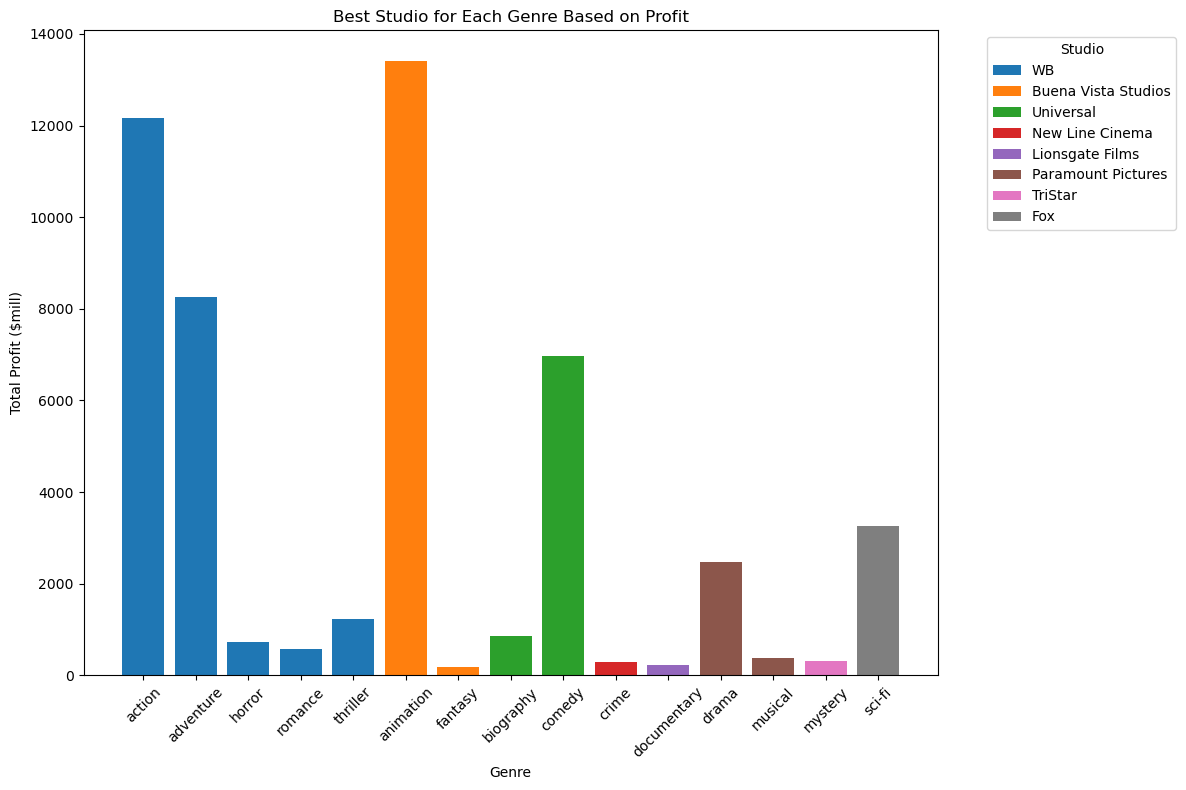

In [35]:
# Group the dataset by genre and studio, then calculate the sum of profit for each combination
genre_studio_profit = df.groupby(['Genre', 'Studio'])['Profit ($mill)'].sum().reset_index()

# Find the top studio for each genre based on profit
top_studios_by_genre = genre_studio_profit.loc[genre_studio_profit.groupby('Genre')['Profit ($mill)'].idxmax()]

# Get the list of unique studios and assign a unique color to each
unique_studios = top_studios_by_genre['Studio'].unique()
studio_colors = sns.color_palette('tab10', n_colors=len(unique_studios))

# Create a dictionary mapping each studio to its corresponding color
studio_color_map = dict(zip(unique_studios, studio_colors))

# Set up the plot
plt.figure(figsize=(12, 8))

# Plotting
bars = []
for i, studio in enumerate(unique_studios):
    studio_data = top_studios_by_genre[top_studios_by_genre['Studio'] == studio]
    bar = plt.bar(studio_data['Genre'], studio_data['Profit ($mill)'], color=studio_color_map[studio])
    bars.append(bar[0])

# Add legend with studio names and corresponding colors
plt.legend(bars, unique_studios, title='Studio', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add labels and title
plt.title('Best Studio for Each Genre Based on Profit')
plt.xlabel('Genre')
plt.ylabel('Total Profit ($mill)')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

# Domestic Gross % by Genre

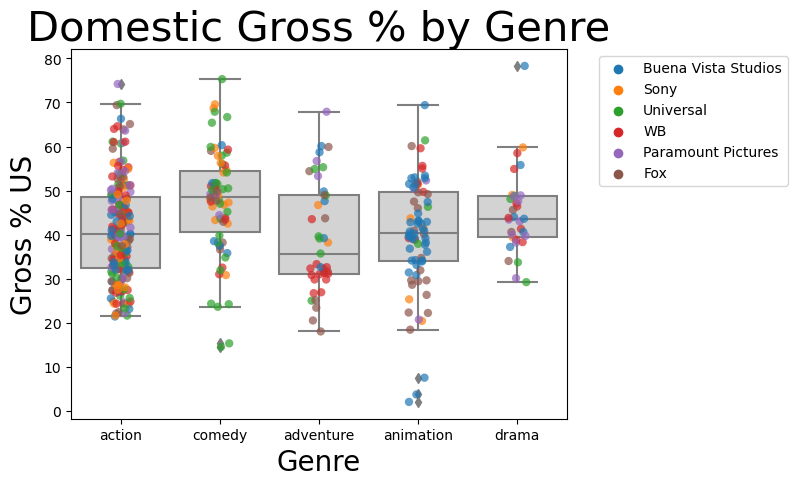

In [36]:
top6_studio=['Buena Vista Studios','Fox','Paramount Pictures','Sony','Universal','WB']
studio_df=df[df.Studio.isin(top6_studio)]

genre_filter =['action','adventure','animation','comedy','drama']
genre_df=studio_df[studio_df.Genre.isin(genre_filter)]
ax=sns.boxplot(data=genre_df,x='Genre',y='Gross % US',orient='v',color='lightgray')
plt.setp(ax.artists,alpha=0.5)
sns.stripplot(x='Genre',y='Gross % US',data=genre_df,hue='Studio',jitter=True,size=6,alpha=0.7)
ax.axes.set_title('Domestic Gross % by Genre',fontsize=30)
ax.set_xlabel('Genre',fontsize=20)
ax.set_ylabel('Gross % US',fontsize=20)
ax.legend(bbox_to_anchor=(1.05,1),loc=2)

In [37]:
# Printing data types of each column
print(df.dtypes)

Day of Week                       object
Director                          object
Genre                             object
Movie Title                       object
Release Date              datetime64[ns]
Studio                            object
Adjusted Gross ($mill)            object
Budget ($mill)                   float64
Gross ($mill)                    float64
IMDb Rating                      float64
MovieLens Rating                 float64
Overseas ($mill)                  object
Overseas%                        float64
Profit ($mill)                   float64
Profit%                          float64
Runtime (min)                      int64
US ($mill)                       float64
Gross % US                       float64
Release Year                       int32
dtype: object


# Recommendation model using K-NN

In [38]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import LabelEncoder

# Preprocess the data and select relevant features
# Assuming df is your dataset containing IMDb rating, MovieLens rating, and genre

# Feature selection
X = df[['IMDb Rating', 'MovieLens Rating', 'Genre']]

# Encode genre using LabelEncoder
genre_encoder = LabelEncoder()
X['Genre'] = genre_encoder.fit_transform(X['Genre'])

# Train the model
model = NearestNeighbors(n_neighbors=5, algorithm='auto')
model.fit(X)

# User input
user_input_imdb = float(input("Enter IMDb rating: "))
user_input_movielens = float(input("Enter MovieLens rating: "))
user_input_genre = input("Enter movie genre: ")

# Encode user input genre
user_input_genre_encoded = genre_encoder.transform([user_input_genre])

# Transform user input into a format compatible with the model
user_input = [[user_input_imdb, user_input_movielens, user_input_genre_encoded[0]]]

# Find nearest neighbors (recommendations) based on user input
distances, indices = model.kneighbors(user_input)

# Print recommended movies
print("Recommended Movies:")
for index in indices[0]:
    print(df.iloc[index]['Movie Title'])


C:\Users\Sahil\AppData\Local\Temp\ipykernel_12108\455030640.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Genre'] = genre_encoder.fit_transform(X['Genre'])


Enter IMDb rating: 7
Enter MovieLens rating: 5
Enter movie genre: action
Recommended Movies:
The Heat
The Hunt for Red October
The Fugitive
Sherlock Holmes: A Game of Shadows
The Hunger Games


C:\Users\Sahil\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
